In [1]:
import model
import data_handler
import model_analysis

import pandas as pd
from sklearn.neighbors import NearestNeighbors

import os
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def validate_inputs():
    """Validate input parameters."""
    if sum([Use_rand_params, Use_row_num, Use_init_params]) != 1:
        raise ValueError("Set exactly one of Use_rand_params, Use_row_num, or Use_init_params to True.")

    if Full_taylor_degree <= Approximation_degree:
        raise ValueError("Approximation degree must be less than the full Taylor degree.")

    if not isinstance(Interval_length, int) or Interval_length < 1:
        raise ValueError("Interval length must be a positive integer.")

    if not isinstance(Num_of_nodes, int) or Num_of_nodes < 1:
        raise ValueError("Number of nodes must be a positive integer.")

    if not isinstance(Approximation_degree, int) or Approximation_degree < 0:
        raise ValueError("Approximation degree must be a non-negative integer.")

    if not isinstance(Full_taylor_degree, int) or Full_taylor_degree < 1:
        raise ValueError("Full Taylor degree must be a positive integer.")


def reset_data():
    """Reset and process data using data_handler."""
    temp = data_handler.Data_handler()
    for ticker in Tickers:
        temp.add_ticker(ticker, start_date=start_date, end_date=end_date)
    temp.process_tickers(Full_taylor_degree, rolling=Moving_average)

def reprocess_data():
    """Reset and process data using data_handler."""
    temp = data_handler.Data_handler()
    for ticker in Tickers:
        temp.add_ticker(ticker, start_date=start_date, end_date=end_date)
    temp.process_tickers(Full_taylor_degree, rolling=Moving_average)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Initial params were: [ 1.35151104e+04 -1.75910156e+02  5.37011719e+00]
-121
6030
Total length = 0.329 years
fin


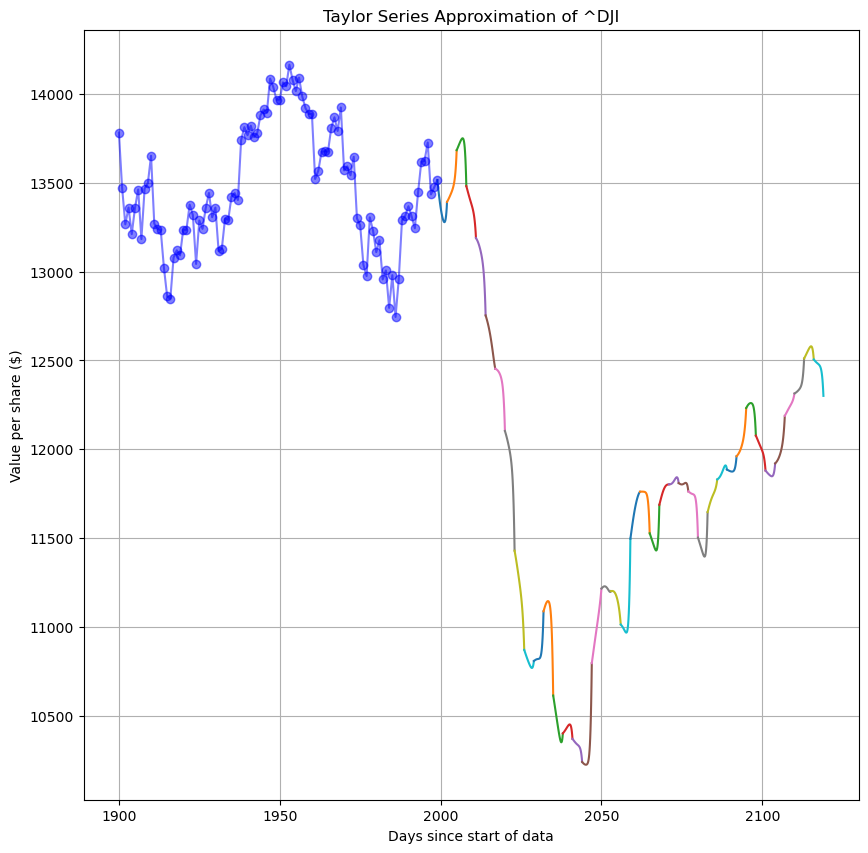

In [7]:
#Main

# Add functionality later
KNN_Weight = 1.0  # Must be a float greater than 0
Add_noise = True

# Data files; automate later
Ticker_name = "^DJI"
Processed_data_file_path = "Stock_data/Processed_data/Dow Jones Industrial Average_data.csv"
Raw_data_file_path = "Stock_data/Raw_data/Dow Jones Industrial Average_data.csv"

# Model Variables
Approximation_degree = 2 # Must be an int greater than 0
KNN_Neighbors = 3 # Must be an int greater than 0
Num_of_nodes = 40  # Adjustable
Interval_length = 3 # days

# Parameter Selection
Use_rand_params = False
Use_row_num = True
Row_num = -1 #-1 = last point
Use_init_params = False
Init_params = [25.16, -.25]

# Data Variables
Reset_data = True #Must be true inorder for following to take effect
Tickers = ["^GSPC", "^DJI", "^W5000", "algm"]
Full_taylor_degree = 6
Moving_average = 1
start_date="2000-01-01" 
end_date="2023-12-31"
start_day = 2000

# Info Flags
Node_info = False
Show_legend = False
Overlap_data = True
resolution = 0.1

#Main function
# Validate inputs
validate_inputs()

# Data management
if Reset_data:
    reset_data()

#starts = model_analysis.test_region_generator(max_days = 120)

#for start_day in starts:
#    print(start_day)

# Initialize spline functions
Functions = model.Spline_functions(
    Processed_data_file_path,
    Ticker_name,
    interval_length=Interval_length,
    k=KNN_Neighbors,
    resolution = resolution,
    taylor_degree=Approximation_degree,
    start_day = start_day
)

# Create nodes and print initial parameters
if Use_rand_params:
    params, row = Functions.get_rand_params_from_data()
    _, _ = Functions.Create_node(params, size=Num_of_nodes)
    print('Initial params were:', params)
elif Use_row_num:
    params, row= Functions.get_params_from_row_num(Row_num)
    print('Initial params were:', params)
    # Create nodes if necessary, or adjust according to needs
    _, _ = Functions.Create_node(params, size=Num_of_nodes)
else:
    _, _ = Functions.Create_node(Init_params, size=Num_of_nodes)
    row = None
    print('Initial params were:', Init_params)

# Graph the functions
fig, ax = Functions.graph_functions(show_legend=Show_legend)

if Overlap_data and not Use_init_params:
    plotter = data_handler.Plotter(Processed_data_file_path, processed_data = True)
    # Ensure row is an integer or handle None case in the plot method
    if row is None:
        pass
    else:
        print(row - Num_of_nodes * Interval_length)
        ax = plotter.plot(ax, start = start_day-100, end = start_day) #this is the line I need to fix to plot correctly

# Print node information
if Node_info:
    Functions.Nodes_info(all=True)

days, prediction = Functions.get_prediction_data()

# Final output
print(f'Total length = {Num_of_nodes * Interval_length / 365:.3f} years')
print('fin')

plt.show()

In [ ]:
# Add functionality later
KNN_Weight = 1.0  # Must be a float greater than 0
Add_noise = True

# Data files; automate later
Ticker_name = "^DJI"
Processed_data_file_path = "Stock_data/Processed_data/Dow Jones Industrial Average_data.csv"
Raw_data_file_path = "Stock_data/Raw_data/Dow Jones Industrial Average_data.csv"

Reset_data = True #Must be true inorder for following to take effect
Tickers = ["^GSPC", "^DJI", "^W5000", "algm"]
Moving_average = 1
start_date="2000-01-01" 
end_date="2023-12-31"
resolution = 1

Use_rand_params = False
Use_init_params = False
Use_row_num = True
Row_num = -1 #-1 = last point

#info flags
Node_info = False
Show_legend = False
Overlap_data = False

Max_region_length: 240
Moving_avg = 1

Interval_lengths = np.linspace(1,10,10)
for Interval_length in Interval_length:
    
    Full_taylor_degrees = np.linspace(1,10,10)
        for Full_taylor_degree in Full_taylor_degrees:
            
            Approximation_degrees = np.linspace(1,Full_taylor_degree-1,Full_taylor_degree-1)
                for Approximation_degree in Approximation_degrees:
                    
                    KNN_Neighborses = np.linspace(1,10)
                        for KNN_Neighbors in KNN_Neighborses:
                            
                            Num_of_nodes = math.floor(Max_days / Interval_length)
                            True_prediction_length = Num_of_nodes*Interval_length
                            
                            #validate the inputs
                            validate_inputs()

                            starts = test_region_generator

                            days, accuracies, errors = model_analysis.analyze_model()
                            